# [OSMsc](https://github.com/ruirzma/osmsc) city objects

Author: [Rui Ma](https://github.com/ruirzma)

This notebook shows the OSMsc module.


In [4]:
import numpy as np
import osmsc as oc
import osmnx as ox

In [6]:
cityName = "Paris"
bbox_Paris = (48.8695, 2.3908, 48.8825, 2.4108)

In [7]:
BG = oc.building_group(bbox = bbox_Paris)
building_gdf = BG.get_gdf(tags=True, building_levels=True)

# If the external building height dataset is unavailable,
# Assume building level is 3m
building_gdf["building_levels"] = building_gdf["building_levels"].replace(np.nan, 0)
building_gdf["Building_height"] = building_gdf["building_levels"] * 3
building_gdf.head()

,osmid,geometry,tags,building_levels,osmscID,Building_area,Building_perimeter,Building_height
0,63212010,"POLYGON ((2.39680 48.88232, 2.39673 48.88237, ...","{'building': 'yes', 'building:levels': '9', 's...",9.0,Building_63212010,425.941590,126.101343,27.0
1,63212012,"POLYGON ((2.39486 48.87986, 2.39472 48.87985, ...","{'building': 'house', 'source': 'cadastre-dgi-...",0.0,Building_63212012,42.765888,29.051447,0.0
2,63212018,"POLYGON ((2.39156 48.88066, 2.39154 48.88068, ...","{'building': 'yes', 'building:levels': '1', 's...",1.0,Building_63212018,58.690170,33.174859,3.0
3,63212023,"POLYGON ((2.39126 48.88133, 2.39127 48.88134, ...","{'building': 'yes', 'source': 'cadastre-dgi-fr...",0.0,Building_63212023,81.502088,43.837655,0.0
4,63212025,"POLYGON ((2.39941 48.87697, 2.39939 48.87696, ...","{'building': 'yes', 'building:levels': '4', 's...",4.0,Building_63212025,47.378189,27.752066,12.0


In [8]:
building_gdf_prj = ox.project_gdf(building_gdf)

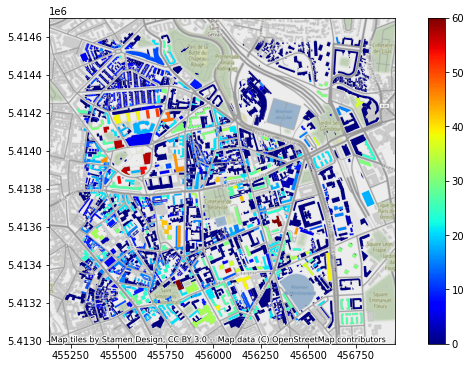

In [9]:
fig, ax = oc.plot.gdf_with_basemap(gdf= building_gdf_prj, figsize = (12,6), zoom="auto",column="Building_height",cmap = "jet", legend= True)

In [10]:
oc.plot.viz_buildings(building_gdf, zoom=11, max_zoom=16, pitch=45, bearing=0, html_name = "viz_buildings")